**SEGMENTATION OF CREDIT CARD CUSTOMERS**

In [1]:
pip install pandas_profiling

Note: you may need to restart the kernel to use updated packages.


In [2]:
import sys
sys.version

'3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]'

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import scipy.stats as stats
import pandas_profiling

%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 7.5
plt.rcParams['axes.grid'] = True

from matplotlib.backends.backend_pdf import PdfPages

In [4]:
from sklearn.cluster import KMeans

# center and scale the data
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import sklearn.metrics as metrics

In [5]:
Cust= pd.read_csv("CC_GENERAL.csv")
Cust.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [6]:
### Exporting pandas profiling output to html file

output = pandas_profiling.ProfileReport(Cust)

output.to_file(output_file='pandas_profiling.html')

Summarize dataset:   0%|          | 0/31 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

**Columns to drop**

In [7]:
Cust.drop(["CUST_ID","ONEOFF_PURCHASES"], axis=1, inplace=True)

In [8]:
Cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   INSTALLMENTS_PURCHASES            8950 non-null   float64
 4   CASH_ADVANCE                      8950 non-null   float64
 5   PURCHASES_FREQUENCY               8950 non-null   float64
 6   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 7   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 8   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 9   CASH_ADVANCE_TRX                  8950 non-null   int64  
 10  PURCHASES_TRX                     8950 non-null   int64  
 11  CREDIT_LIMIT                      8949 non-null   float64
 12  PAYMEN

In [9]:
Cust.TENURE.unique()

array([12,  8, 11,  9, 10,  7,  6], dtype=int64)

In [10]:
#Handling Outliers - Method2
def outlier_capping(x):
    x = x.clip(upper=x.quantile(0.99), lower=x.quantile(0.01))
    return x

Cust=Cust.apply(lambda x: outlier_capping(x))

In [11]:
#Handling missings - Method2
def Missing_imputation(x):
    x = x.fillna(x.median())
    return x

Cust=Cust.apply(lambda x: Missing_imputation(x))

In [12]:
Cust.corr()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1.000000,0.336473,0.165697,0.093372,0.541226,-0.087193,0.070796,-0.072010,0.463637,0.445766,0.133319,0.528972,0.344744,0.587668,-0.331618,0.074122
BALANCE_FREQUENCY,0.336473,1.000000,0.170515,0.153734,0.107785,0.232890,0.202845,0.179472,0.193894,0.162818,0.212610,0.098461,0.092491,0.208279,-0.098040,0.121525
PURCHASES,0.165697,0.170515,1.000000,0.708735,-0.091164,0.504218,0.608351,0.400843,-0.149419,-0.099497,0.780817,0.367477,0.536270,0.131455,0.202887,0.107263
INSTALLMENTS_PURCHASES,0.093372,0.153734,0.708735,1.000000,-0.102052,0.551693,0.248240,0.634500,-0.162397,-0.111387,0.687538,0.239973,0.369886,0.148561,0.215048,0.103310
CASH_ADVANCE,0.541226,0.107785,-0.091164,-0.102052,1.000000,-0.249835,-0.104954,-0.207395,0.683400,0.710309,-0.112613,0.314398,0.425517,0.257143,-0.179068,-0.083485
PURCHASES_FREQUENCY,-0.087193,0.232890,0.504218,0.551693,-0.249835,1.000000,0.501343,0.862934,-0.312493,-0.238395,0.642234,0.119658,0.120897,0.001043,0.305802,0.061506
ONEOFF_PURCHASES_FREQUENCY,0.070796,0.202845,0.608351,0.248240,-0.104954,0.501343,1.000000,0.142329,-0.113575,-0.081339,0.601289,0.296128,0.278313,-0.016426,0.157531,0.082466
PURCHASES_INSTALLMENTS_FREQUENCY,-0.072010,0.179472,0.400843,0.634500,-0.207395,0.862934,0.142329,1.000000,-0.265907,-0.200169,0.593674,0.060279,0.097830,0.032330,0.250087,0.073275
CASH_ADVANCE_FREQUENCY,0.463637,0.193894,-0.149419,-0.162397,0.683400,-0.312493,-0.113575,-0.265907,1.000000,0.881092,-0.151307,0.134731,0.215544,0.203585,-0.253292,-0.129136
CASH_ADVANCE_TRX,0.445766,0.162818,-0.099497,-0.111387,0.710309,-0.238395,-0.081339,-0.200169,0.881092,1.000000,-0.096709,0.160628,0.274589,0.235553,-0.201056,-0.051821


<AxesSubplot:>

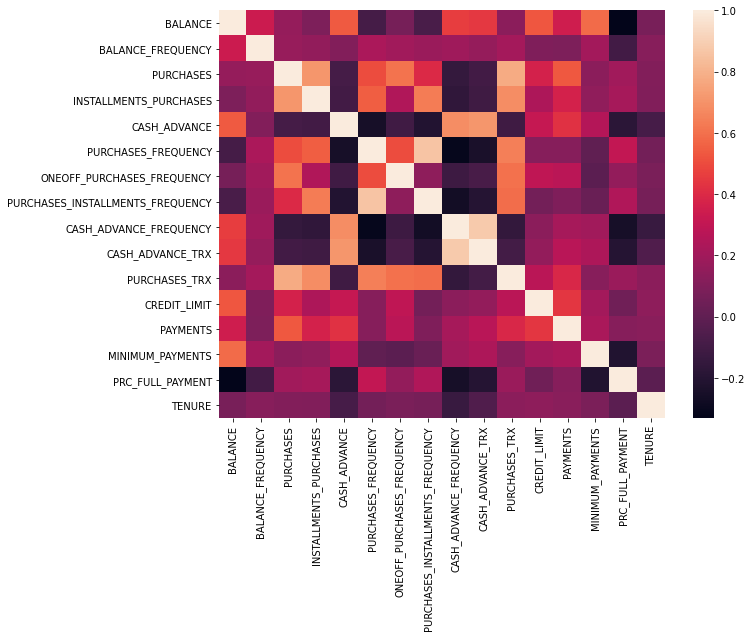

In [13]:
# visualize correlation matrix in Seaborn using a heatmap
sns.heatmap(Cust.corr())

**Standardizing data**

- To put data on the same scale

In [14]:
sc=StandardScaler()

In [15]:
Cust_scaled=sc.fit_transform(Cust)

In [16]:
pd.DataFrame(Cust_scaled).shape

(8950, 16)

**Applying Principal Content Analysis (PCA)**

- **Principal Component Analysis (PCA)** is a linear dimensionality reduction technique that can be utilized for extracting information from a high-dimensional space by projecting it into a lower-dimensional sub-space. It tries to preserve the essential parts that have more variation of the data and remove the non-essential parts with fewer variation.

- Dimensions are nothing but features that represent the data. For example, A 28 X 28 image has 784 picture elements (pixels) that are the dimensions or features which together represent that image.

- **PCA** is a statistical procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated variables (entities each of which takes on various numerical values) into a set of values of linearly uncorrelated variables called principal components.




In [17]:
pc = PCA(n_components=16)

In [18]:
pc.fit(Cust_scaled)

PCA(n_components=16)

In [19]:
pc.explained_variance_

array([4.49294562, 3.71013917, 1.31312801, 1.23637776, 0.98854472,
       0.90781906, 0.74531867, 0.64361486, 0.56588142, 0.44287711,
       0.25748003, 0.2185639 , 0.19247972, 0.14086715, 0.10475678,
       0.04099392])

In [20]:
#Eigen values
sum(pc.explained_variance_)

16.00178790926361

In [21]:
#The amount of variance that each PC explains
var= pc.explained_variance_ratio_

In [22]:
var

array([0.28077773, 0.23185779, 0.08206133, 0.07726498, 0.06177714,
       0.05673235, 0.04657721, 0.04022143, 0.03536364, 0.02767673,
       0.0160907 , 0.01365872, 0.01202864, 0.00880321, 0.00654657,
       0.00256183])

In [23]:
#Cumulative Variance explains
var1=np.cumsum(np.round(pc.explained_variance_ratio_, decimals=4)*100)

In [24]:
var1

array([ 28.08,  51.27,  59.48,  67.21,  73.39,  79.06,  83.72,  87.74,
        91.28,  94.05,  95.66,  97.03,  98.23,  99.11,  99.76, 100.02])

Number of components have choosen as 6 based on cumulative variacne is explaining >75 % and individual component explaining >0.8 variance

In [25]:
pc_final=PCA(n_components=6).fit(Cust_scaled)

In [26]:
pc_final.explained_variance_

array([4.49294562, 3.71013917, 1.31312801, 1.23637776, 0.98854472,
       0.90781906])

In [27]:
reduced_cr=pc_final.transform(Cust_scaled)

In [28]:
dimensions = pd.DataFrame(reduced_cr)

In [29]:
dimensions

,0,1,2,3,4,5
0,-1.568068,-1.590712,-0.433800,-0.499811,-0.018647,-0.176656
1,-1.710546,2.560827,0.940659,-0.657582,0.750505,-0.715697
2,0.968049,-0.212456,-0.462638,-1.437203,-2.371268,0.525640
3,-1.218497,-0.449040,0.230053,-1.585376,0.201449,0.368019
4,-1.571051,-1.152649,-0.721283,-0.687674,-0.542942,-0.209158
...,...,...,...,...,...,...
8945,0.100498,-2.140022,0.687782,3.272804,0.076013,2.325924
8946,-0.165045,-1.819638,-0.181686,3.077168,-0.096691,2.912474
8947,-0.588996,-2.103828,0.671747,2.745200,0.133976,2.809187
8948,-2.397229,-1.368608,1.332355,1.839629,-0.392644,2.904258


In [30]:
dimensions.columns = ["C1", "C2", "C3", "C4", "C5", "C6"]

In [31]:
dimensions.head()

,C1,C2,C3,C4,C5,C6
0,-1.568068,-1.590712,-0.433800,-0.499811,-0.018647,-0.176656
1,-1.710546,2.560827,0.940659,-0.657582,0.750505,-0.715697
2,0.968049,-0.212456,-0.462638,-1.437203,-2.371268,0.525640
3,-1.218497,-0.449040,0.230053,-1.585376,0.201449,0.368019
4,-1.571051,-1.152649,-0.721283,-0.687674,-0.542942,-0.209158


**Factor Loading Matrix**

Loadings=Eigenvectors * sqrt(Eigenvalues)

loadings are the covariances/correlations between the original variables and the unit-scaled components.

In [32]:
Loadings =  pd.DataFrame((pc_final.components_.T * np.sqrt(pc_final.explained_variance_)).T,columns=Cust.columns).T

In [33]:
Loadings.to_csv("Loadings.csv")

**Clustering**

In [34]:
#selected the list variables from PCA based on factor loading matrics
list_var = ['PURCHASES_TRX','INSTALLMENTS_PURCHASES','PURCHASES_INSTALLMENTS_FREQUENCY','MINIMUM_PAYMENTS','BALANCE','CREDIT_LIMIT','CASH_ADVANCE','PRC_FULL_PAYMENT','ONEOFF_PURCHASES_FREQUENCY']

In [35]:
Cust_scaled1=pd.DataFrame(Cust_scaled, columns=Cust.columns)
Cust_scaled1.head(5)

Cust_scaled2=Cust_scaled1[list_var]
Cust_scaled2.head(5)

,PURCHASES_TRX,INSTALLMENTS_PURCHASES,PURCHASES_INSTALLMENTS_FREQUENCY,MINIMUM_PAYMENTS,BALANCE,CREDIT_LIMIT,CASH_ADVANCE,PRC_FULL_PAYMENT,ONEOFF_PURCHASES_FREQUENCY
0,-0.579714,-0.427513,-0.707313,-0.486172,-0.762856,-0.978415,-0.527079,-0.525551,-0.678661
1,-0.675130,-0.568588,-0.916995,0.255009,0.844867,0.711297,3.101370,0.234227,-0.678661
2,-0.102638,-0.568588,-0.916995,-0.098610,0.485181,0.852106,-0.527079,-0.525551,2.673451
3,-0.627422,-0.568588,-0.916995,-0.348846,0.063882,0.852106,-0.411186,-0.525551,-0.399319
4,-0.627422,-0.568588,-0.916995,-0.402520,-0.367830,-0.922091,-0.527079,-0.525551,-0.399319


**Segmentation**

In [36]:
km_3=KMeans(n_clusters=3,random_state=123)

In [37]:
km_3.fit(Cust_scaled2)

KMeans(n_clusters=3, random_state=123)

In [38]:
print(km_3.labels_)

[1 2 1 ... 1 1 1]


In [39]:
km_3.cluster_centers_

array([[ 1.59031306,  1.42911699,  1.10441018,  0.02810618,  0.06005424,
         0.68676537, -0.32179493,  0.57518816,  1.18652719],
       [-0.33529304, -0.30196049, -0.19199416, -0.26831962, -0.36675137,
        -0.378397  , -0.25144758, -0.05140132, -0.24899695],
       [-0.30124273, -0.2675395 , -0.40740799,  1.26771083,  1.70653303,
         1.0032634 ,  1.61004365, -0.44792826, -0.23040373]])

In [40]:
km_4=KMeans(n_clusters=4,random_state=123).fit(Cust_scaled2)
#km_5.labels_a

km_5=KMeans(n_clusters=5,random_state=123).fit(Cust_scaled2)
#km_5.labels_

km_6=KMeans(n_clusters=6,random_state=123).fit(Cust_scaled2)
#km_6.labels_

km_7=KMeans(n_clusters=7,random_state=123).fit(Cust_scaled2)
#km_7.labels_

km_8=KMeans(n_clusters=8,random_state=123).fit(Cust_scaled2)
#km_5.labels_

In [41]:
metrics.silhouette_score(Cust_scaled2, km_3.labels_)

0.3326544357376077

**5 Clusters are better**

In [42]:
# Conactenating labels found through Kmeans with data 

# save the cluster labels and sort by cluster
Cust['cluster_3'] = km_3.labels_
Cust['cluster_4'] = km_4.labels_
Cust['cluster_5'] = km_5.labels_
Cust['cluster_6'] = km_6.labels_
Cust['cluster_7'] = km_7.labels_
Cust['cluster_8'] = km_8.labels_

In [43]:
Cust.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,...,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8
0,40.900749,0.818182,95.40,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,...,201.802084,139.509787,0.000000,12,1,1,0,0,3,1
1,3202.467416,0.909091,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,...,4103.032597,1072.340217,0.222222,12,2,2,4,4,4,3
2,2495.148862,1.000000,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,...,622.066742,627.284787,0.000000,12,1,1,0,0,0,4
3,1666.670542,0.636364,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,...,0.000000,312.343947,0.000000,12,1,1,0,0,3,5
4,817.714335,1.000000,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,...,678.334763,244.791237,0.000000,12,1,1,0,0,3,1


**Choosing number clusters using Silhouette Coefficient**

In [44]:
# calculate SC for K=6
from sklearn import metrics
metrics.silhouette_score(Cust_scaled2, km_3.labels_)

0.3326544357376077

In [45]:
# calculate SC for K=3 through K=9
k_range = range(3, 13)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=123)
    km.fit(Cust_scaled2)
    scores.append(metrics.silhouette_score(Cust_scaled2, km.labels_))

In [46]:
scores

[0.3326544357376077,
 0.25583689807001847,
 0.2614624942201507,
 0.26854894852069633,
 0.2868836634550262,
 0.2645122375903499,
 0.2687267232020123,
 0.27408506763542656,
 0.25906579152524234,
 0.2662704677610347]

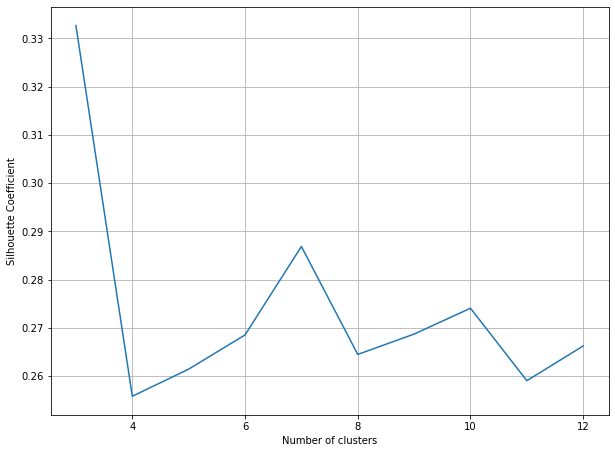

In [47]:
# plot the results
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

**Segment Distribution**

In [48]:
Cust.cluster_3.value_counts()*100/sum(Cust.cluster_3.value_counts())

1    68.636872
0    17.217877
2    14.145251
Name: cluster_3, dtype: float64

In [49]:
pd.Series.sort_index(Cust.cluster_3.value_counts())

0    1541
1    6143
2    1266
Name: cluster_3, dtype: int64

**Profiling**

In [50]:
size=pd.concat([pd.Series(Cust.cluster_3.size), pd.Series.sort_index(Cust.cluster_3.value_counts()), pd.Series.sort_index(Cust.cluster_4.value_counts()),
           pd.Series.sort_index(Cust.cluster_5.value_counts()), pd.Series.sort_index(Cust.cluster_6.value_counts()),
           pd.Series.sort_index(Cust.cluster_7.value_counts()), pd.Series.sort_index(Cust.cluster_8.value_counts())])

In [51]:
size

0    8950
0    1541
1    6143
2    1266
0     989
1    4303
2    1106
3    2552
0    4070
1    1117
2     651
3    2041
4    1071
0    3985
1     724
2    1086
3    2003
4     980
5     172
0     928
1     535
2     900
3    3699
4     943
5     173
6    1772
0     173
1    3129
2    1679
3     511
4     908
5    1145
6     519
7     886
dtype: int64

In [52]:
Seg_size=pd.DataFrame(size, columns=['Seg_size'])
Seg_Pct = pd.DataFrame(size/Cust.cluster_3.size, columns=['Seg_Pct'])
Seg_size.T

,0,0,1,2,0,1,2,3,0,1,...,5,6,0,1,2,3,4,5,6,7
Seg_size,8950,1541,6143,1266,989,4303,1106,2552,4070,1117,...,173,1772,173,3129,1679,511,908,1145,519,886


In [53]:
Seg_Pct.T

,0,0,1,2,0,1,2,3,0,1,...,5,6,0,1,2,3,4,5,6,7
Seg_Pct,1.0,0.172179,0.686369,0.141453,0.110503,0.480782,0.123575,0.28514,0.454749,0.124804,...,0.01933,0.197989,0.01933,0.349609,0.187598,0.057095,0.101453,0.127933,0.057989,0.098994


In [54]:
pd.concat([Seg_size.T, Seg_Pct.T], axis=0)

,0,0,1,2,0,1,2,3,0,1,...,5,6,0,1,2,3,4,5,6,7
Seg_size,8950.0,1541.000000,6143.000000,1266.000000,989.000000,4303.000000,1106.000000,2552.00000,4070.000000,1117.000000,...,173.00000,1772.000000,173.00000,3129.000000,1679.000000,511.000000,908.000000,1145.000000,519.000000,886.000000
Seg_Pct,1.0,0.172179,0.686369,0.141453,0.110503,0.480782,0.123575,0.28514,0.454749,0.124804,...,0.01933,0.197989,0.01933,0.349609,0.187598,0.057095,0.101453,0.127933,0.057989,0.098994


In [55]:
Cust.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,...,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8
0,40.900749,0.818182,95.40,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,...,201.802084,139.509787,0.000000,12,1,1,0,0,3,1
1,3202.467416,0.909091,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,...,4103.032597,1072.340217,0.222222,12,2,2,4,4,4,3
2,2495.148862,1.000000,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,...,622.066742,627.284787,0.000000,12,1,1,0,0,0,4
3,1666.670542,0.636364,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,...,0.000000,312.343947,0.000000,12,1,1,0,0,3,5
4,817.714335,1.000000,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,...,678.334763,244.791237,0.000000,12,1,1,0,0,3,1


In [56]:
# Mean value gives a good indication of the distribution of data. So we are finding mean value for each variable for each cluster
Profling_output = pd.concat([Cust.apply(lambda x: x.mean()).T, Cust.groupby('cluster_3').apply(lambda x: x.mean()).T, Cust.groupby('cluster_4').apply(lambda x: x.mean()).T,
          Cust.groupby('cluster_5').apply(lambda x: x.mean()).T, Cust.groupby('cluster_6').apply(lambda x: x.mean()).T,
          Cust.groupby('cluster_7').apply(lambda x: x.mean()).T, Cust.groupby('cluster_8').apply(lambda x: x.mean()).T], axis=1)

In [57]:
Profling_output

,0,0,1,2,0,1,2,3,0,1,...,5,6,0,1,2,3,4,5,6,7
BALANCE,1541.046707,1655.084754,820.663980,4897.743752,2413.641783,1073.882786,5042.837548,472.954680,1078.123025,122.084535,...,3939.743792,881.206517,3915.394895,801.391355,837.860666,6229.739456,1084.951400,3031.087982,2861.835331,86.074596
BALANCE_FREQUENCY,0.878083,0.975880,0.835077,0.967724,0.985301,0.838765,0.968624,0.863589,0.832381,0.825121,...,0.983360,0.904648,0.983360,0.804019,0.907846,0.972357,0.965601,0.928365,0.986404,0.790197
PURCHASES,936.229237,3124.913082,448.384029,639.287141,3942.220222,363.299837,573.241257,894.636301,328.782990,1213.695506,...,1809.903873,859.428871,1794.965376,254.112148,879.652978,625.970626,2061.134207,381.685974,4730.562293,804.847946
INSTALLMENTS_PURCHASES,384.498368,1350.310125,179.472176,203.740058,1549.465464,57.370033,188.454784,569.570851,42.023236,537.938542,...,895.423916,597.553014,866.267500,43.412777,615.238094,219.521174,301.313910,79.948279,2158.023328,592.832438
CASH_ADVANCE,935.920972,363.335053,490.096776,3796.152361,566.820617,682.354035,4023.434786,168.424305,695.688013,85.854397,...,1224.988466,293.317088,1100.827702,503.658888,276.266214,5861.364361,317.184411,2146.100990,645.825560,79.706708
PURCHASES_FREQUENCY,0.490351,0.954980,0.411522,0.307294,0.963149,0.227110,0.302737,0.832290,0.199173,0.759118,...,0.567913,0.858748,0.563578,0.158953,0.874246,0.324127,0.888174,0.182254,0.974805,0.721466
ONEOFF_PURCHASES_FREQUENCY,0.202458,0.554779,0.128220,0.133829,0.680577,0.149241,0.124296,0.140772,0.137086,0.280429,...,0.130627,0.105755,0.132072,0.089282,0.107933,0.144971,0.825179,0.091349,0.635658,0.079820
PURCHASES_INSTALLMENTS_FREQUENCY,0.364437,0.803672,0.287589,0.202683,0.811016,0.083171,0.201174,0.736379,0.062510,0.556687,...,0.506854,0.803920,0.496739,0.068445,0.820768,0.223633,0.344894,0.095258,0.921002,0.642252
CASH_ADVANCE_FREQUENCY,0.134017,0.060960,0.106583,0.356059,0.085356,0.142614,0.365213,0.038181,0.144767,0.014124,...,0.134101,0.065224,0.127357,0.129422,0.063652,0.451897,0.066294,0.277130,0.088822,0.012477
CASH_ADVANCE_TRX,3.079330,1.401687,2.178577,9.492101,2.110212,2.914711,9.867089,0.790752,2.968305,0.309758,...,4.323699,1.313205,4.075145,2.529882,1.300179,12.962818,1.419604,6.518777,2.233141,0.248307


In [58]:
Profling_output_final=pd.concat([Seg_size.T, Seg_Pct.T, Profling_output], axis=0)

In [59]:
Profling_output_final

,0,0,1,2,0,1,2,3,0,1,...,5,6,0,1,2,3,4,5,6,7
Seg_size,8950.000000,1541.000000,6143.000000,1266.000000,989.000000,4303.000000,1106.000000,2552.000000,4070.000000,1117.000000,...,173.000000,1772.000000,173.000000,3129.000000,1679.000000,511.000000,908.000000,1145.000000,519.000000,886.000000
Seg_Pct,1.000000,0.172179,0.686369,0.141453,0.110503,0.480782,0.123575,0.285140,0.454749,0.124804,...,0.019330,0.197989,0.019330,0.349609,0.187598,0.057095,0.101453,0.127933,0.057989,0.098994
BALANCE,1541.046707,1655.084754,820.663980,4897.743752,2413.641783,1073.882786,5042.837548,472.954680,1078.123025,122.084535,...,3939.743792,881.206517,3915.394895,801.391355,837.860666,6229.739456,1084.951400,3031.087982,2861.835331,86.074596
BALANCE_FREQUENCY,0.878083,0.975880,0.835077,0.967724,0.985301,0.838765,0.968624,0.863589,0.832381,0.825121,...,0.983360,0.904648,0.983360,0.804019,0.907846,0.972357,0.965601,0.928365,0.986404,0.790197
PURCHASES,936.229237,3124.913082,448.384029,639.287141,3942.220222,363.299837,573.241257,894.636301,328.782990,1213.695506,...,1809.903873,859.428871,1794.965376,254.112148,879.652978,625.970626,2061.134207,381.685974,4730.562293,804.847946
INSTALLMENTS_PURCHASES,384.498368,1350.310125,179.472176,203.740058,1549.465464,57.370033,188.454784,569.570851,42.023236,537.938542,...,895.423916,597.553014,866.267500,43.412777,615.238094,219.521174,301.313910,79.948279,2158.023328,592.832438
CASH_ADVANCE,935.920972,363.335053,490.096776,3796.152361,566.820617,682.354035,4023.434786,168.424305,695.688013,85.854397,...,1224.988466,293.317088,1100.827702,503.658888,276.266214,5861.364361,317.184411,2146.100990,645.825560,79.706708
PURCHASES_FREQUENCY,0.490351,0.954980,0.411522,0.307294,0.963149,0.227110,0.302737,0.832290,0.199173,0.759118,...,0.567913,0.858748,0.563578,0.158953,0.874246,0.324127,0.888174,0.182254,0.974805,0.721466
ONEOFF_PURCHASES_FREQUENCY,0.202458,0.554779,0.128220,0.133829,0.680577,0.149241,0.124296,0.140772,0.137086,0.280429,...,0.130627,0.105755,0.132072,0.089282,0.107933,0.144971,0.825179,0.091349,0.635658,0.079820
PURCHASES_INSTALLMENTS_FREQUENCY,0.364437,0.803672,0.287589,0.202683,0.811016,0.083171,0.201174,0.736379,0.062510,0.556687,...,0.506854,0.803920,0.496739,0.068445,0.820768,0.223633,0.344894,0.095258,0.921002,0.642252


In [60]:
#Profling_output_final.columns = ['Seg_' + str(i) for i in Profling_output_final.columns]
Profling_output_final.columns = ['Overall', 'KM3_1', 'KM3_2', 'KM3_3',
                                'KM4_1', 'KM4_2', 'KM4_3', 'KM4_4',
                                'KM5_1', 'KM5_2', 'KM5_3', 'KM5_4', 'KM5_5',
                                'KM6_1', 'KM6_2', 'KM6_3', 'KM6_4', 'KM6_5','KM6_6',
                                'KM7_1', 'KM7_2', 'KM7_3', 'KM7_4', 'KM7_5','KM7_6','KM7_7',
                                'KM8_1', 'KM8_2', 'KM8_3', 'KM8_4', 'KM8_5','KM8_6','KM8_7','KM8_8']

In [61]:
Profling_output_final

,Overall,KM3_1,KM3_2,KM3_3,KM4_1,KM4_2,KM4_3,KM4_4,KM5_1,KM5_2,...,KM7_6,KM7_7,KM8_1,KM8_2,KM8_3,KM8_4,KM8_5,KM8_6,KM8_7,KM8_8
Seg_size,8950.000000,1541.000000,6143.000000,1266.000000,989.000000,4303.000000,1106.000000,2552.000000,4070.000000,1117.000000,...,173.000000,1772.000000,173.000000,3129.000000,1679.000000,511.000000,908.000000,1145.000000,519.000000,886.000000
Seg_Pct,1.000000,0.172179,0.686369,0.141453,0.110503,0.480782,0.123575,0.285140,0.454749,0.124804,...,0.019330,0.197989,0.019330,0.349609,0.187598,0.057095,0.101453,0.127933,0.057989,0.098994
BALANCE,1541.046707,1655.084754,820.663980,4897.743752,2413.641783,1073.882786,5042.837548,472.954680,1078.123025,122.084535,...,3939.743792,881.206517,3915.394895,801.391355,837.860666,6229.739456,1084.951400,3031.087982,2861.835331,86.074596
BALANCE_FREQUENCY,0.878083,0.975880,0.835077,0.967724,0.985301,0.838765,0.968624,0.863589,0.832381,0.825121,...,0.983360,0.904648,0.983360,0.804019,0.907846,0.972357,0.965601,0.928365,0.986404,0.790197
PURCHASES,936.229237,3124.913082,448.384029,639.287141,3942.220222,363.299837,573.241257,894.636301,328.782990,1213.695506,...,1809.903873,859.428871,1794.965376,254.112148,879.652978,625.970626,2061.134207,381.685974,4730.562293,804.847946
INSTALLMENTS_PURCHASES,384.498368,1350.310125,179.472176,203.740058,1549.465464,57.370033,188.454784,569.570851,42.023236,537.938542,...,895.423916,597.553014,866.267500,43.412777,615.238094,219.521174,301.313910,79.948279,2158.023328,592.832438
CASH_ADVANCE,935.920972,363.335053,490.096776,3796.152361,566.820617,682.354035,4023.434786,168.424305,695.688013,85.854397,...,1224.988466,293.317088,1100.827702,503.658888,276.266214,5861.364361,317.184411,2146.100990,645.825560,79.706708
PURCHASES_FREQUENCY,0.490351,0.954980,0.411522,0.307294,0.963149,0.227110,0.302737,0.832290,0.199173,0.759118,...,0.567913,0.858748,0.563578,0.158953,0.874246,0.324127,0.888174,0.182254,0.974805,0.721466
ONEOFF_PURCHASES_FREQUENCY,0.202458,0.554779,0.128220,0.133829,0.680577,0.149241,0.124296,0.140772,0.137086,0.280429,...,0.130627,0.105755,0.132072,0.089282,0.107933,0.144971,0.825179,0.091349,0.635658,0.079820
PURCHASES_INSTALLMENTS_FREQUENCY,0.364437,0.803672,0.287589,0.202683,0.811016,0.083171,0.201174,0.736379,0.062510,0.556687,...,0.506854,0.803920,0.496739,0.068445,0.820768,0.223633,0.344894,0.095258,0.921002,0.642252


In [62]:
Profling_output_final.to_csv('Profiling_output.csv')

**For more details we can see the profiling output**